# Baseball Case Study

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success.    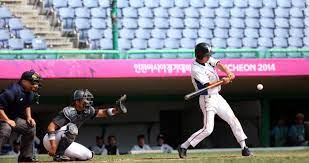

Problem Statement-There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 


# Attribute Information:
-- Input features-
W - This column indicates the number of Wins credited to a pitcher

R - This column indicates Runs scored.

AB - This column means At bat or time at bat. 

H - This column means Hit. 

2B - This column means the act of a batter striking the pitched ball and safely reaching second base without being called out by the umpire, without the benefit of a fielder's misplay (see error) or another runner being put out on a fielder's choice.

3B - This column measns a Triple.

HR - This column means Home runs. 

BB - This column means Base on balls (also called a "walk"). 

SO - Also denoted as "K" means Strikeout. It occurs when a batter accumulates three strikes during a time at bat. It usually means that the batter is out: number of batters who received strike three.


SB - This column means Stolen base. 

RA - This column means Run Average. It refer to measures of the rate at which runs are allowed or scored.

ER - This column means Earned run. 

ERA - This column means Earned Run Average. 

CG - This means Complete Game. 
 
SHO - This means Shutout. It refers to the act by which a single pitcher pitches a complete game and does not allow the opposing team to score a run: number of complete games pitched with no runs allowed.

SV - This means Save. 

E - This means Errors. 

# importing required libraries
Pandas is a useful library in data handling. Numpy library used for working with arrays. Seaborn/Matplotlib are used for data visualisation purpose. Sklearn – This module contains multiple libraries having pre-implemented functions to perform tasks from data preprocessing to model development and evaluation.


# Step 1. Loading the Dataset

In [209]:
import sklearn
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
 
import warnings
warnings.filterwarnings('ignore')

In [210]:
baseball_df = pd.read_csv('baseball_data.txt') 
baseball_df.head(15)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


# About the columns:

-- Input Variable-
W - This column indicates the number of Wins credited to a pitcher: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work.

R - This column indicates Runs scored. A run is scored when a player advances around first, second and third base and returns safely to home plate, touching the bases in that order, before three outs are recorded and all obligations to reach base safely on batted balls are met or assured: number of times a player crosses home plate.

AB - This column means At bat or time at bat. It's is a batter's turn batting against a pitcher: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction.

H - This column means Hit. It's also called a "base hit", is credited to a batter when the batter safely reaches or passes first base after hitting the ball into fair territory, without the benefit of either an error or a fielder's choice: reaching base because of a batted, fair ball without error by the defense.

2B - This column means the act of a batter striking the pitched ball and safely reaching second base without being called out by the umpire, without the benefit of a fielder's misplay (see error) or another runner being put out on a fielder's choice. A double is a type of hit (the others being the single, triple and home run) and is sometimes called a "two-bagger" or "two-base hit": hits on which the batter reaches second base safely without the contribution of a fielding error.

3B - This column measns a Triple.It's is the act of a batter safely reaching third base after hitting the ball, with neither the benefit of a fielder's misplay nor another runner being put out on a fielder's choice. A triple is sometimes called a "three-bagger" or "three-base hit": hits on which the batter reaches third base safely without the contribution of a fielding error.

HR - This column means Home runs. It's scored when the ball is hit in such a way that the batter is able to circle the bases and reach home plate safely in one play without any errors being committed by the defensive team. A home run is usually achieved by hitting the ball over the outfield fence between the foul poles (or hitting either foul pole) without the ball touching the field: hits on which the batter successfully touched all four bases, without the contribution of a fielding error.

BB - This column means Base on balls (also called a "walk"). It occurs in baseball when a batter receives four pitches that the umpire calls balls, and is in turn awarded first base without the possibility of being called out: hitter not swinging at four pitches called out of the strike zone and awarded first base.

SO - Also denoted as "K" means Strikeout. It occurs when a batter accumulates three strikes during a time at bat. It usually means that the batter is out: number of batters who received strike three.

SB - This column means Stolen base. It occurs when a runner advances to a base to which they are not entitled and the official scorer rules that the advance should be credited to the action of the runner: number of bases advanced by the runner while the ball is in the possession of the defense.

RA - This column means Run Average. It refer to measures of the rate at which runs are allowed or scored.

ER - This column means Earned run. It refers to any run that was fully enabled by the offensive team's production in the face of competent play from the defensive team: number of runs that did not occur as a result of errors or passed balls.

ERA - This column means Earned Run Average. It refers to the average of earned runs allowed by a pitcher per nine innings pitched (i.e. the traditional length of a game). It is determined by dividing the number of earned runs allowed by the number of innings pitched and multiplying by nine: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched.

CG - This means Complete Game. It's the act of a pitcher pitching an entire game without the benefit of a relief pitcher. A pitcher who meets this criterion will be credited with a complete game regardless of the number of innings played: number of games where player was the only pitcher for their team.
 
SHO - This means Shutout. It refers to the act by which a single pitcher pitches a complete game and does not allow the opposing team to score a run: number of complete games pitched with no runs allowed.

SV - This means Save. It's credited to a pitcher who finishes a game for the winning team under certain prescribed circumstances: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings.

E - This means Errors. It's an act, in the judgment of the official scorer, of a fielder misplaying a ball in a manner that allows a batter or baserunner to advance one or more bases or allows a plate appearance to continue after the batter should have been put out. The term error is sometimes used to refer to the play during which an error was committed: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result.

-- Output variable: Number of predicted wins (W)


# Data Analysis and EDA

In [211]:
#Checking the data dimension
baseball_df.shape

(30, 17)

<AxesSubplot:>

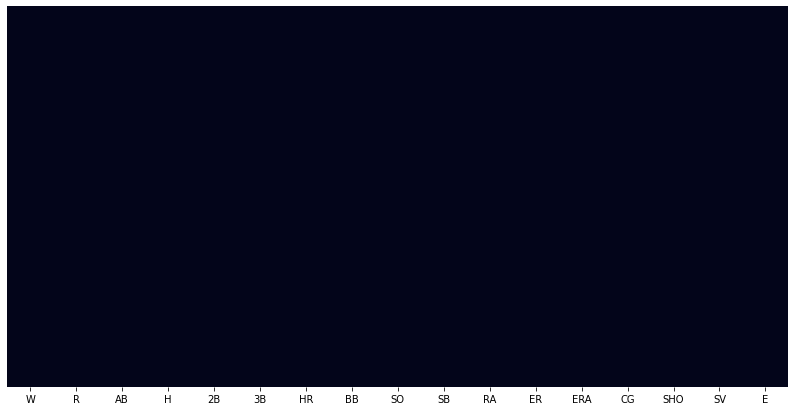

In [212]:
#Checking for null values
fig, ax = plt.subplots(figsize=(14, 7))
sns.heatmap(baseball_df.isnull(),yticklabels=False,cbar=False)

In [213]:
#Lets check the data types of each column present in dataset
baseball_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


All the datatypes are in appropriate so no need to change datatypes.

In [214]:
#Information about the data type of clumns of data
baseball_df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


# Step 2: Data Visualization

Exploratory Data Analysis
EDA is an approach to analysing the data using visual techniques. It is used to discover trends, and patterns, or to check assumptions with the help of statistical summaries and graphical representations.  Now let’s check the number of null values in the dataset columns wise.


In [215]:
baseball_df.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

In [216]:
baseball_df.isnull().sum().sum()

0

This is to check it there any null values present in given dataset.0 means no blank entry in the dataset

<AxesSubplot:>

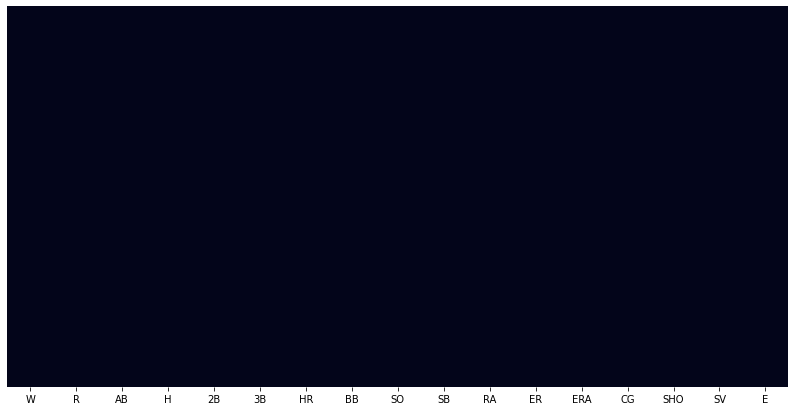

In [217]:
#Checking for null values

fig, ax = plt.subplots(figsize=(14, 7))
sns.heatmap(baseball_df.isnull(),yticklabels=False,cbar=False)


We can see no null values present in the given data set.

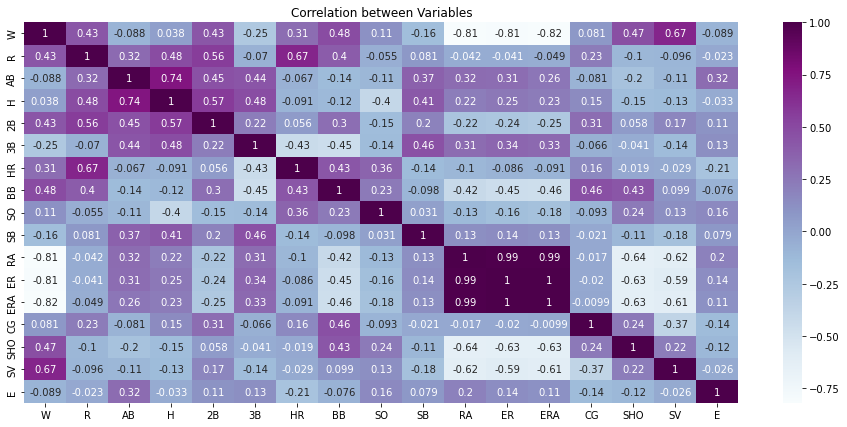

In [218]:
plt.figure(figsize=(16,7))
sns.heatmap(data = baseball_df.corr(), annot=True, cmap= 'BuPu')
plt.title("Correlation between Variables")
plt.show()

In [219]:
baseball_df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [220]:
len(baseball_df.columns)

17

<AxesSubplot:xlabel='R', ylabel='Density'>

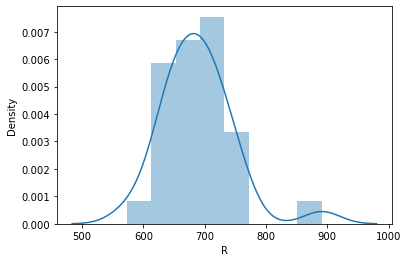

In [221]:

sns.distplot(baseball_df["R"])

<AxesSubplot:>

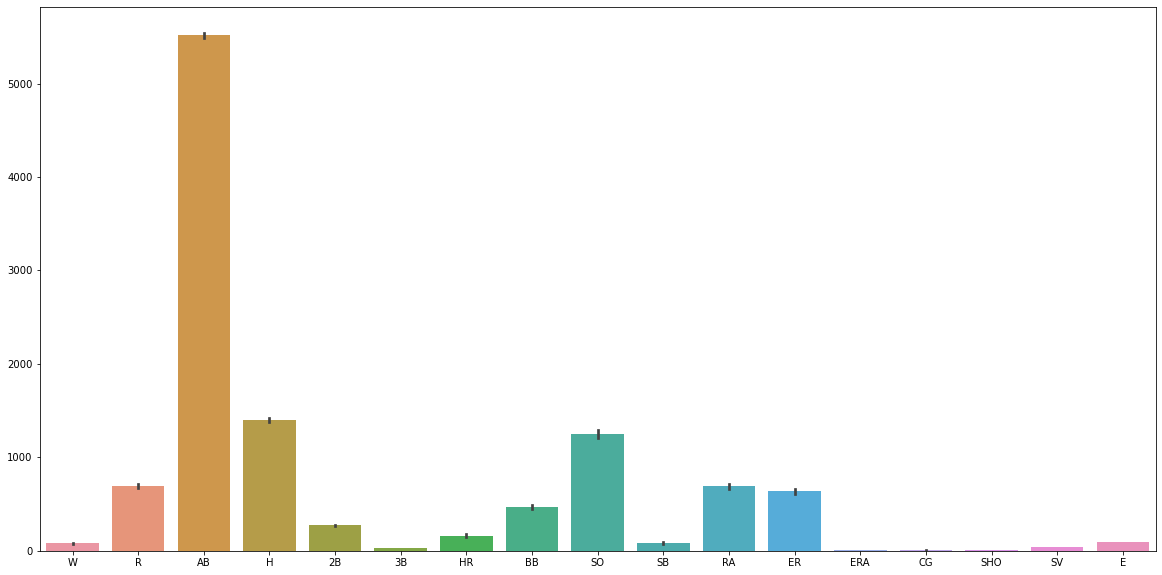

In [222]:
import seaborn as sns
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data = baseball_df)

In [223]:
baseball_df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

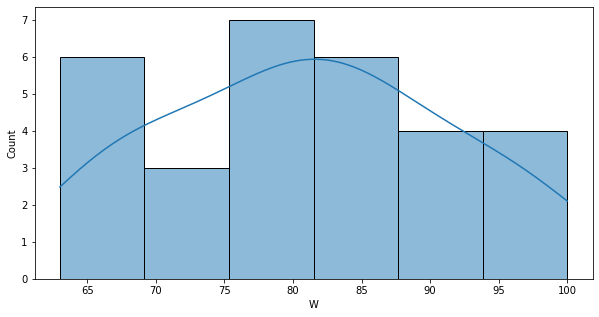

In [224]:
plt.figure(figsize=(10,5))
sns.histplot(x='W',data=baseball_df,kde=True)
plt.show()

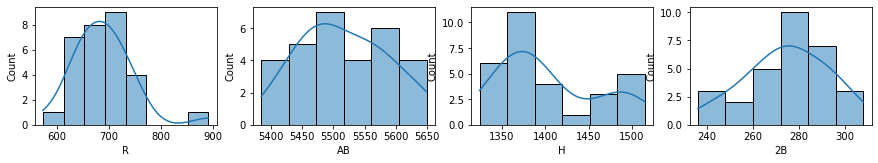

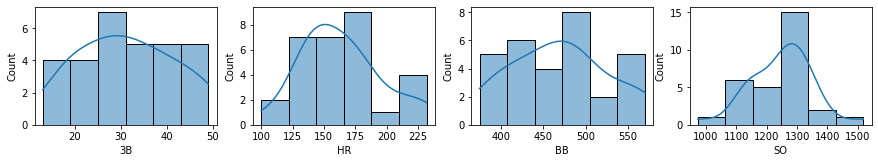

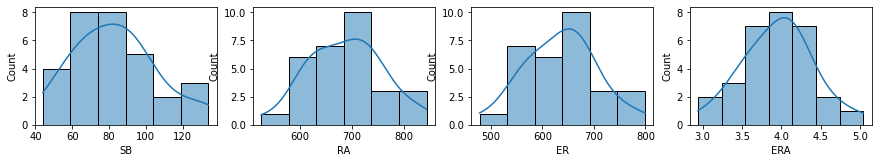

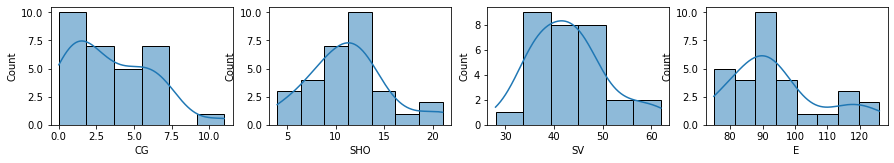

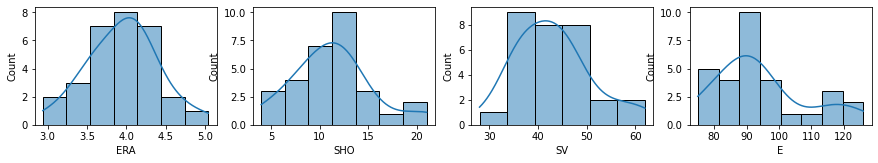

In [225]:
plt.figure(figsize=(15,10))
plt.subplot(4, 4, 1)
sns.histplot(x='R',data=baseball_df,kde=True)

plt.subplot(4,4,2)
sns.histplot(x='AB',data=baseball_df,kde=True)

plt.subplot(4,4,3)
sns.histplot(x='H',data=baseball_df,kde=True)

plt.subplot(4,4,4)
sns.histplot(x='2B',data=baseball_df,kde=True)
plt.show()

plt.figure(figsize=(15,10))
plt.subplot(4,4,5)
sns.histplot(x='3B',data=baseball_df,kde=True)

plt.subplot(4,4,6)
sns.histplot(x='HR',data=baseball_df,kde=True)

plt.subplot(4,4,7)
sns.histplot(x='BB',data=baseball_df,kde=True)

plt.subplot(4,4,8)
sns.histplot(x='SO',data=baseball_df,kde=True)
plt.show()

plt.figure(figsize=(15,10))
plt.subplot(4,4,9)
sns.histplot(x='SB',data=baseball_df,kde=True)

plt.subplot(4,4,10)
sns.histplot(x='RA',data=baseball_df,kde=True)

plt.subplot(4,4,11)
sns.histplot(x='ER',data=baseball_df,kde=True)

plt.subplot(4,4,12)
sns.histplot(x='ERA',data=baseball_df,kde=True)
plt.show()

plt.figure(figsize=(15,10))
plt.subplot(4,4,13)
sns.histplot(x='CG',data=baseball_df,kde=True)

plt.subplot(4,4,14)
sns.histplot(x='SHO',data=baseball_df,kde=True)

plt.subplot(4,4,15)
sns.histplot(x='SV',data=baseball_df,kde=True)

plt.subplot(4,4,16)
sns.histplot(x='E',data=baseball_df,kde=True)

plt.figure(figsize=(15,10))
plt.subplot(4,4,13)
sns.histplot(x='ERA',data=baseball_df,kde=True)

plt.subplot(4,4,14)
sns.histplot(x='SHO',data=baseball_df,kde=True)

plt.subplot(4,4,15)
sns.histplot(x='SV',data=baseball_df,kde=True)

plt.subplot(4,4,16)
sns.histplot(x='E',data=baseball_df,kde=True)


plt.show()


In [226]:
baseball_df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

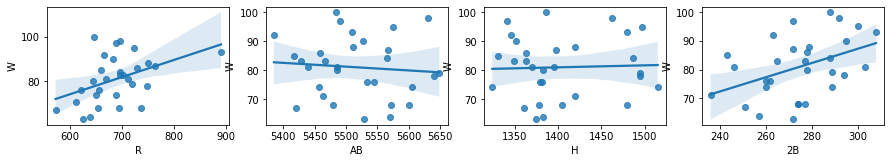

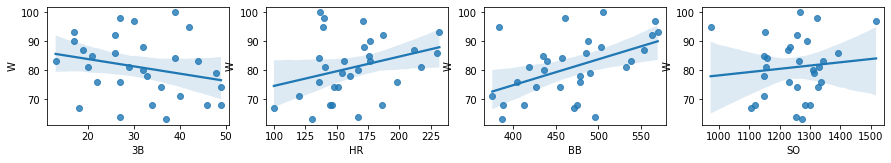

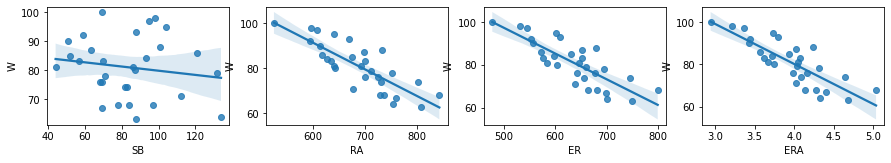

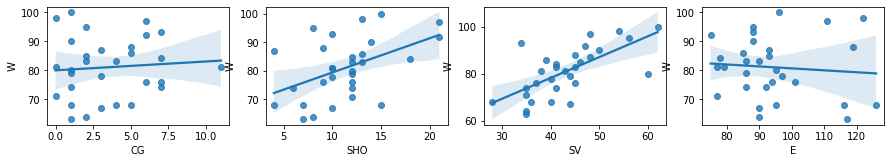

In [227]:
plt.figure(figsize=(15,10))
plt.subplot(4,4,1)
sns.regplot(x='R',y='W',data=baseball_df)

plt.subplot(4,4,2)
sns.regplot(x='AB',y='W',data=baseball_df)

plt.subplot(4,4,3)
sns.regplot(x='H',y='W',data=baseball_df)

plt.subplot(4,4,4)
sns.regplot(x='2B',y='W',data=baseball_df)
plt.show()

plt.figure(figsize=(15,10))
plt.subplot(4,4,5)
sns.regplot(x='3B',y='W',data=baseball_df)

plt.subplot(4,4,6)
sns.regplot(x='HR',y='W',data=baseball_df)

plt.subplot(4,4,7)
sns.regplot(x='BB',y='W',data=baseball_df)

plt.subplot(4,4,8)
sns.regplot(x='SO',y='W',data=baseball_df)
plt.show()

plt.figure(figsize=(15,10))
plt.subplot(4,4,9)
sns.regplot(x='SB',y='W',data=baseball_df)

plt.subplot(4,4,10)
sns.regplot(x='RA',y='W',data=baseball_df)

plt.subplot(4,4,11)
sns.regplot(x='ER',y='W',data=baseball_df)

plt.subplot(4,4,12)
sns.regplot(x='ERA',y='W',data=baseball_df)
plt.show()

plt.figure(figsize=(15,10))
plt.subplot(4,4,13)
sns.regplot(x='CG',y='W',data=baseball_df)

plt.subplot(4,4,14)
sns.regplot(x='SHO',y='W',data=baseball_df)

plt.subplot(4,4,15)
sns.regplot(x='SV',y='W',data=baseball_df)

plt.subplot(4,4,16)
sns.regplot(x='E',y='W',data=baseball_df)
plt.show()

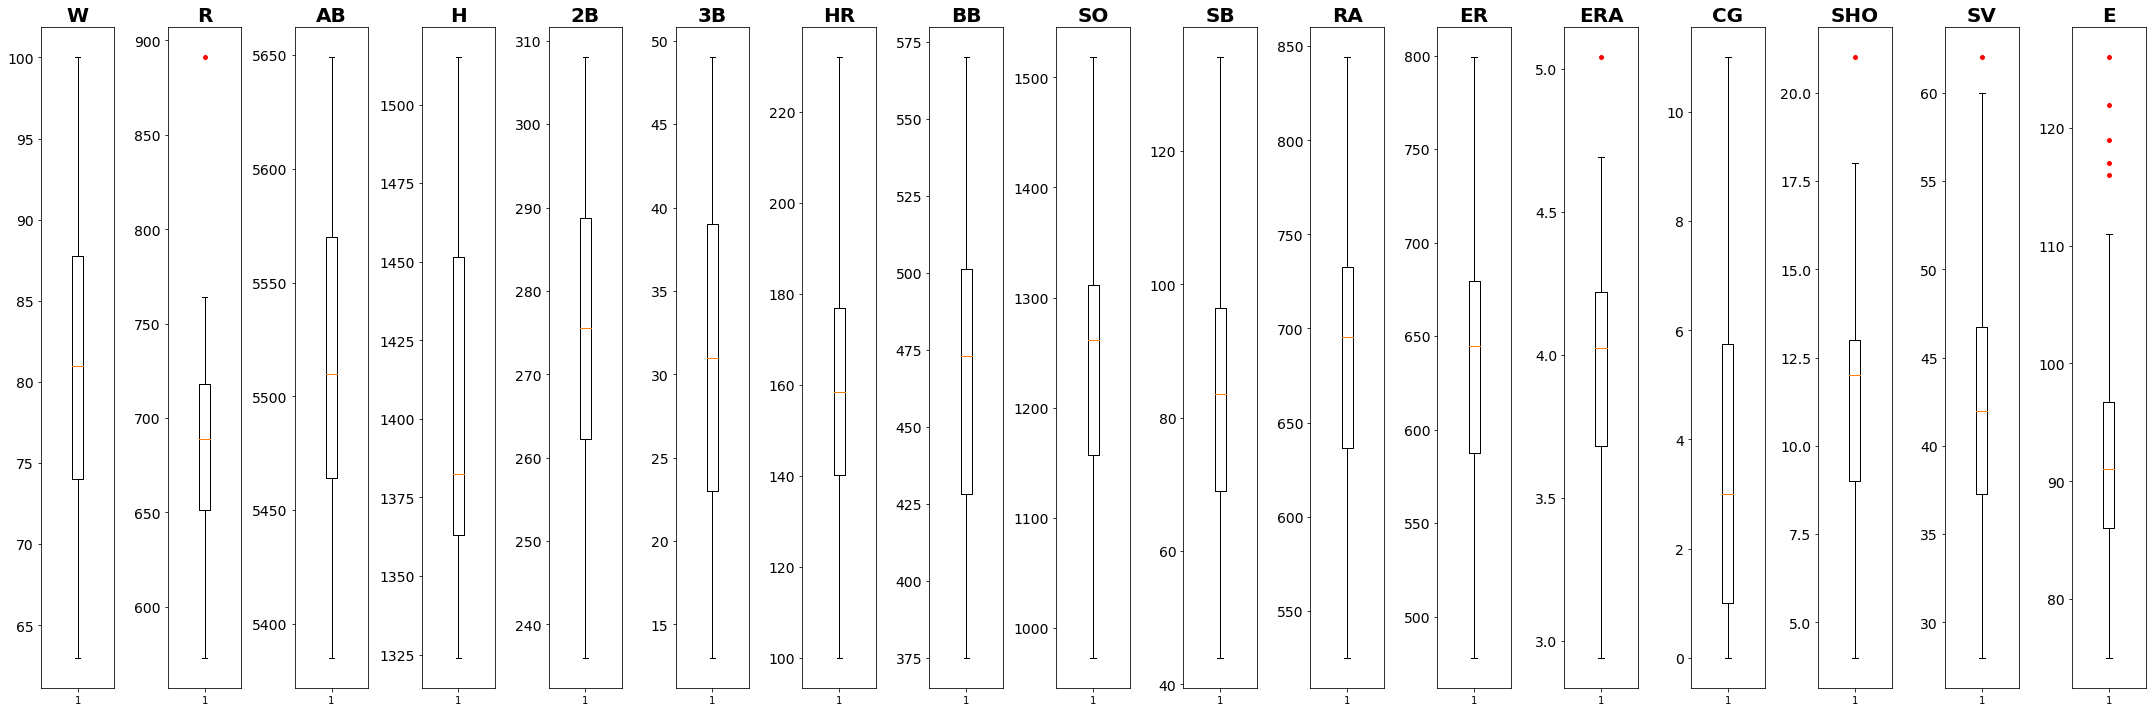

In [228]:
#creating subplot pf each column with its own scale
red_dots = dict(markerfacecolor = 'red', marker = 'o',markeredgecolor='white')
fig, axs = plt.subplots(1,len(baseball_df.columns),figsize=(30,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(baseball_df.iloc[:,i], flierprops=red_dots)
    ax.set_title(baseball_df.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y',labelsize=14)
plt.tight_layout()

In [229]:
baseball_df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

# Observations:

The number of runs ,home runs,doubles,Saves,Shutouts and Walks are highly positively linearly correlated.
Stolen Bases,Runs Allowed,Earned Runs are highly negative linearly correlated.
The remaining features have less to no linear correlation with no of Wins
The dataset set has too much randomness.And only has sets of data which is very little to form a suitable Decision tree.

# Step 3: Data Preperation

IQR method - IQR stands for the interquartile reason it uses percentile for outliers detection 50 percentile is considered as median, 25 percentile represents the Q1, 75 percentile represents Q2.

Upper IQR = 1.5*(Q2-Q1)+Q2
Lower IQR = Q1-1.5*(Q2-Q1)
remove any data outside upper IQR and lowerIQR

In [230]:
baseball_df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


# Removing outliers-

<AxesSubplot:xlabel='E'>

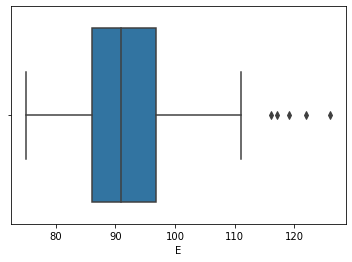

In [231]:
import seaborn as sns
sns.boxplot(x=baseball_df['E'])

In [232]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(baseball_df))
print(z)

           W         R        AB         H        2B        3B        HR  \
0   1.365409  0.619078  0.847731  1.663685  1.420173  1.041193  0.787299   
1   0.197838  0.134432  0.711094  0.970681  0.127403  1.235809  0.243967   
2   0.003243  0.332906  1.115233  0.151891  1.588795  0.223808  0.723377   
3   0.483244  1.146419  0.241522  0.401088  0.828122  0.418423  0.883181   
4   0.677839  0.013270  1.280738  1.984081  0.801892  1.722347  0.403770   
5   1.170814  3.509647  0.104884  1.361089  1.869832  1.391501  2.185047   
6   0.587028  1.311430  0.732263  0.116292  0.153633  1.196885  1.545833   
7   0.003243  0.428681  0.451289  0.596886  1.615025  1.099578  1.705636   
8   0.094054  0.765626  0.451289  0.365489  0.183611  0.068115  0.107601   
9   0.288649  1.034489  1.785913  1.628086  1.082929  0.165423  0.084163   
10  0.684326  1.086415  0.076017  0.275303  0.239818  0.068115  0.267405   
11  0.489731  0.705622  0.826562  0.721484  0.183611  0.515731  2.121125   
12  0.392433

Looking the code and the output above, it is difficult to say which data point is an outlier. Let’s try and define a threshold to identify an outlier.

In [233]:
threshold = 3
print(np.where(z >3))

(array([5], dtype=int64), array([1], dtype=int64))


In the previous section, we saw how one can detect the outlier using Z-score but now we want to remove or filter the outliers and get the clean data. This can be done with just one line code as we have already calculated the Z-score.

In [234]:
baseball_df.shape

(30, 17)

In [235]:
baseball_df_o = baseball_df[(z < 3).all(axis=1)]

In [236]:
baseball_df_o.shape


(29, 17)

In [237]:
def num_cat(baseball_df):
    num = []
    cat = []
    count = baseball_df.nunique()
    for i in df.columns:
        if count[i]>5:
            num.append(i)
        else:
            cat.append(i)
    return(num,cat)

#importing preprocession method power_transform from sklearn
from sklearn.preprocessing import power_transform as PT

def pow_tran(baseball_df,num):
    pt = pd.DataFrame()
    for i in num:
        if baseball_df[i].min()<=0:
            pt1=(df[i]-df[i].min()+0.0001)
        else:
            pt1=df[i]
            pt=pd.concat([pt,pd.DataFrame(pt1)],axis=1)
            pt1=PT(pt)
            pt1=pd.DataFrame(pt1,columns=num)
    return(pt1)

def num_plot(baseball_df,num):
    for i in num:
        plt.figure(figsize=(20,5))
        plt.subplot(1,3,1)
        sns.histplot(x=i,data=df,kde=True,hue='Churn')
        plt.subplot(1,3,2)
        sns.regplot(x=i,y='W',data=baseball_df,kde=True,hue='Churn')
        plt.subplot(1,3,3)
        sns.boxplot(y=i,data=baseball_df)
        plt.show()
        
def z_outlier(baseball_df,num):
    baseball_df_z=baseball_df[num]
    z=np.abs(stat.zscore(baseball_df_z))
    a=int(baseball_df_z.size)
    df_z = baseball_df_z[(z>3).all(axis=1)]
    print("Percent of data retained = "+ str(int(baseball_df_z.size)/a))
    return(baseball_df_z)

def stan_sc(baseball_df,num):
    ss=StandardScaler()
    x = baseball_df[num].to_numpy()
    x1=pd.DataFrame(ss.fit_transform(x),columns=num)
    return(x1)

In [238]:
#Removing redandent data

def pipeline_viz(baseball_df_o):
    num_cat = num_cat(baseball_df)
    num_plot(baseball_df,num)
    df[num] = pow_tran(baseball_df,num)
    df[num] = stan_sc(baseball_df,num)
    df[num] = z_outlier(baseball_df,num)
    baseball_df_new = dimention_reduction(baseball_df,num)
    return (baseball_df_new)

In [239]:
import scipy.stats as stats
z = np.abs(stats.zscore(baseball_df))
a = int(baseball_df.size)
baseball_df = baseball_df[(z>3).all(axis=1)]

In [240]:
a

510

In [241]:
baseball_df_new

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [242]:
baseball_df_new.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

# Step 4: Separeting data into feature and target

In [243]:
features = baseball_df_new.get(['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER','ERA', 'CG', 'SHO', 'SV', 'E'])

In [244]:
features

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [245]:
target = baseball_df_new.loc[0:29,['W']] 
target

,W
0,95
1,83
2,81
3,76
4,74
6,87
7,81
8,80
9,78
10,88


In [246]:
x_train, x_test, y_train ,y_test = train_test_split(features,target,test_size= 0.2,random_state=40)
x_train.shape, x_test.shape

((23, 16), (6, 16))

In [247]:
y_train.shape ,y_test.shape 

((23, 1), (6, 1))

# Step 5: Building Machine Learning Models.

In [248]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Create linear regression object
regr = LinearRegression()
# Train the model using the training sets
regr.fit(x_train, y_train)
# Make predictions using the testing set
y_pred = regr.predict(x_test)
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("(Coefficient of determination:) R^2 %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [[ 1.48939606e-01 -9.10639224e-02  2.33846107e-02 -4.37068344e-02
   1.11224085e-02 -2.01199117e-02 -3.31750184e-02 -2.43913297e-02
  -8.95969282e-03  5.93922273e-02  7.07358345e-01 -1.28096755e+02
   6.78330796e-01  1.73560506e-01  2.37680690e-01 -2.53902597e-02]]
Mean squared error: 92.58
(Coefficient of determination:) R^2 0.28


In [249]:
#Adjusted R^2
#adj r2 = 1-(1-R2)*(n-1)/(n-p-1)

#n =sample size, p = number of independent variables
n = x_test.shape[0]
p = x_test.shape[1]

Adj_R2=1-(1-0.7647753234614156)*(n-1)/(n-p-1)
print("Adjusted accuracy=",Adj_R2)

Adjusted accuracy= 1.1069203075175384


Linear regression — it is an algorithm that minimizes the loss function i.e summation of square error.


In [250]:
#importing module
from sklearn.preprocessing import MinMaxScaler
# creating normalization object 
norm = MinMaxScaler()
# fit data
norm_fit = norm.fit(x_train)
new_xtrain = norm_fit.transform(x_train)
new_xtest = norm_fit.transform(x_test)
# fit data
#norm_fit = norm.fit(y_train)
#new_ytrain = norm_fit.transform(y_train)
#new_ytest = norm_fit.transform(y_test)

In [251]:
# importing modules
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
#creating RandomForestClassifier constructor
rnd = RandomForestClassifier()
# fit data
fit_rnd = rnd.fit(new_xtrain,y_train)
# predicting score
rnd_score = rnd.score(new_xtest,y_test)
y_predict = rnd.predict(x_test)
print('score of model is : ',rnd_score)
# display error rate
print('calculating the error')
# calculating mean squared error
rnd_MSE = mean_squared_error(y_test,y_predict)
# calculating root mean squared error
rnd_RMSE = np.sqrt(rnd_MSE)
# display MSE
print('mean squared error is : ',rnd_MSE)
# display RMSE

score of model is :  0.0
calculating the error
mean squared error is :  203.16666666666666


In [252]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
X, y = make_regression(n_features=16, n_informative=1,random_state=3, shuffle=False)
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X, y)
RandomForestRegressor()
print(regr.predict([[724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88]]))


[93.97214506]


In [253]:
x_train, x_test, y_train ,y_test = train_test_split(features,target,test_size= 0.2,random_state=40)
x_train.shape, x_test.shape

((23, 16), (6, 16))

the randomness of the dataset should be reduced by reducing the number of variables. Which was done by R-square dimension reduction.

Mean squared error: 92.58 Coefficient of determination: 0.28

# Step 6: Model Evaluation

<Figure size 432x288 with 0 Axes>

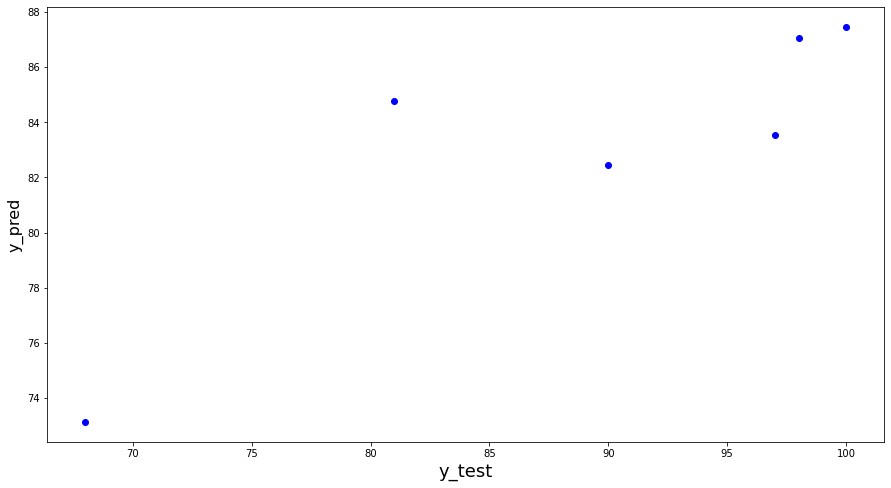

In [255]:
#Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_pred,color ='blue')
fig.suptitle('y_test vs y_pred',fontsize=20)
plt.xlabel('y_test',fontsize = 18)
plt.ylabel('y_pred',fontsize = 16)
plt.show()
#Plotting y_test and y_pred to unde

<Figure size 432x288 with 0 Axes>

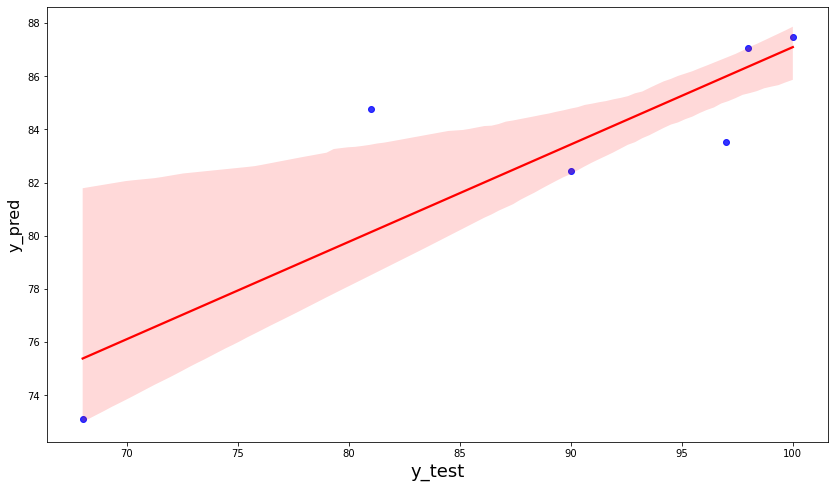

In [256]:
#Regression plot
fig = plt.figure()
plt.figure(figsize=(14,8))
sns.regplot( x=y_test, y=y_pred,ci=68, fit_reg=True,scatter_kws={"color":"blue"}, line_kws={"color":"red"}) 
plt.xlabel('y_test',fontsize = 18)
plt.ylabel('y_pred',fontsize = 16)
plt.show()